In [3]:
!pip install iso3166

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot
from iso3166 import countries
from datetime import datetime, timedelta
import plotly.express as pe


Importing data

In [6]:
df = pd.read_csv("Space_Corrected.csv")

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


Format

In [47]:
df["Date_time"] = pd.to_datetime(df["Datum"])
df["Year"] = df["Date_time"].apply(lambda datetime: datetime.year)
df["Country"]= df["Location"].apply(lambda location: location.split(", ")[-1])
df["Day"] = df["Datum"].apply(lambda time: time.split()[0])
df["Month"] = df["Datum"].apply(lambda point: point.split()[1])

df["Date"] = df["Datum"].apply(lambda dt : dt.split()[2][:2]).astype(int) 
df["Hour"] = df["Datum"].apply(lambda dt : int(dt.split()[-2][:2]) if dt.split()[-1] =='UTC' else np.nan)



In [42]:
df["Country"]

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: Country, Length: 4324, dtype: object

In [48]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': 'Korea, Democratic People Republic of',
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of'}

for country in list_countries :
    df.Country = df.Country.replace(country, list_countries[country])
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date_time,Year,Country,Day,Month,Date,Hour
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.0
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,Thu,Aug,6,4.0
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA,Tue,Aug,4,23.0
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,Thu,Jul,30,21.0
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA,Thu,Jul,30,11.0


(8.5, -0.5)

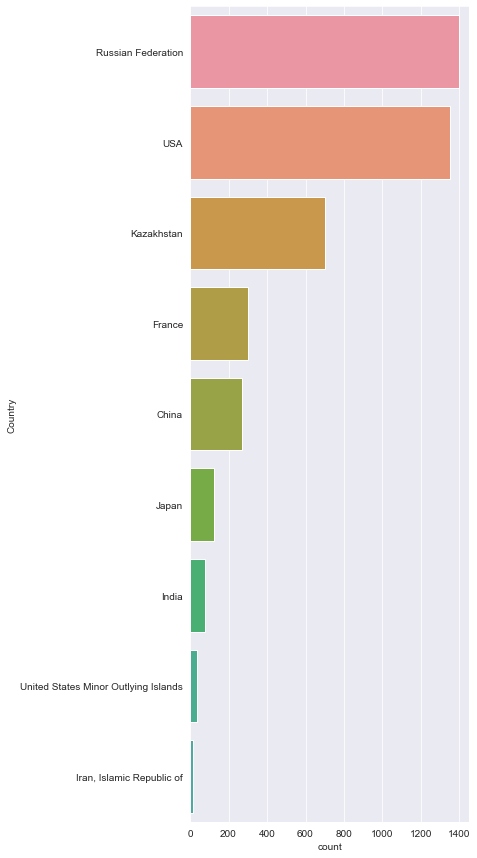

In [73]:
plt.figure(figsize=(5,15))
sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
plt.xlim(0, 1450)
plt.ylim(8.5)

<AxesSubplot:xlabel='count', ylabel='Location'>

C:\Users\jarek\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


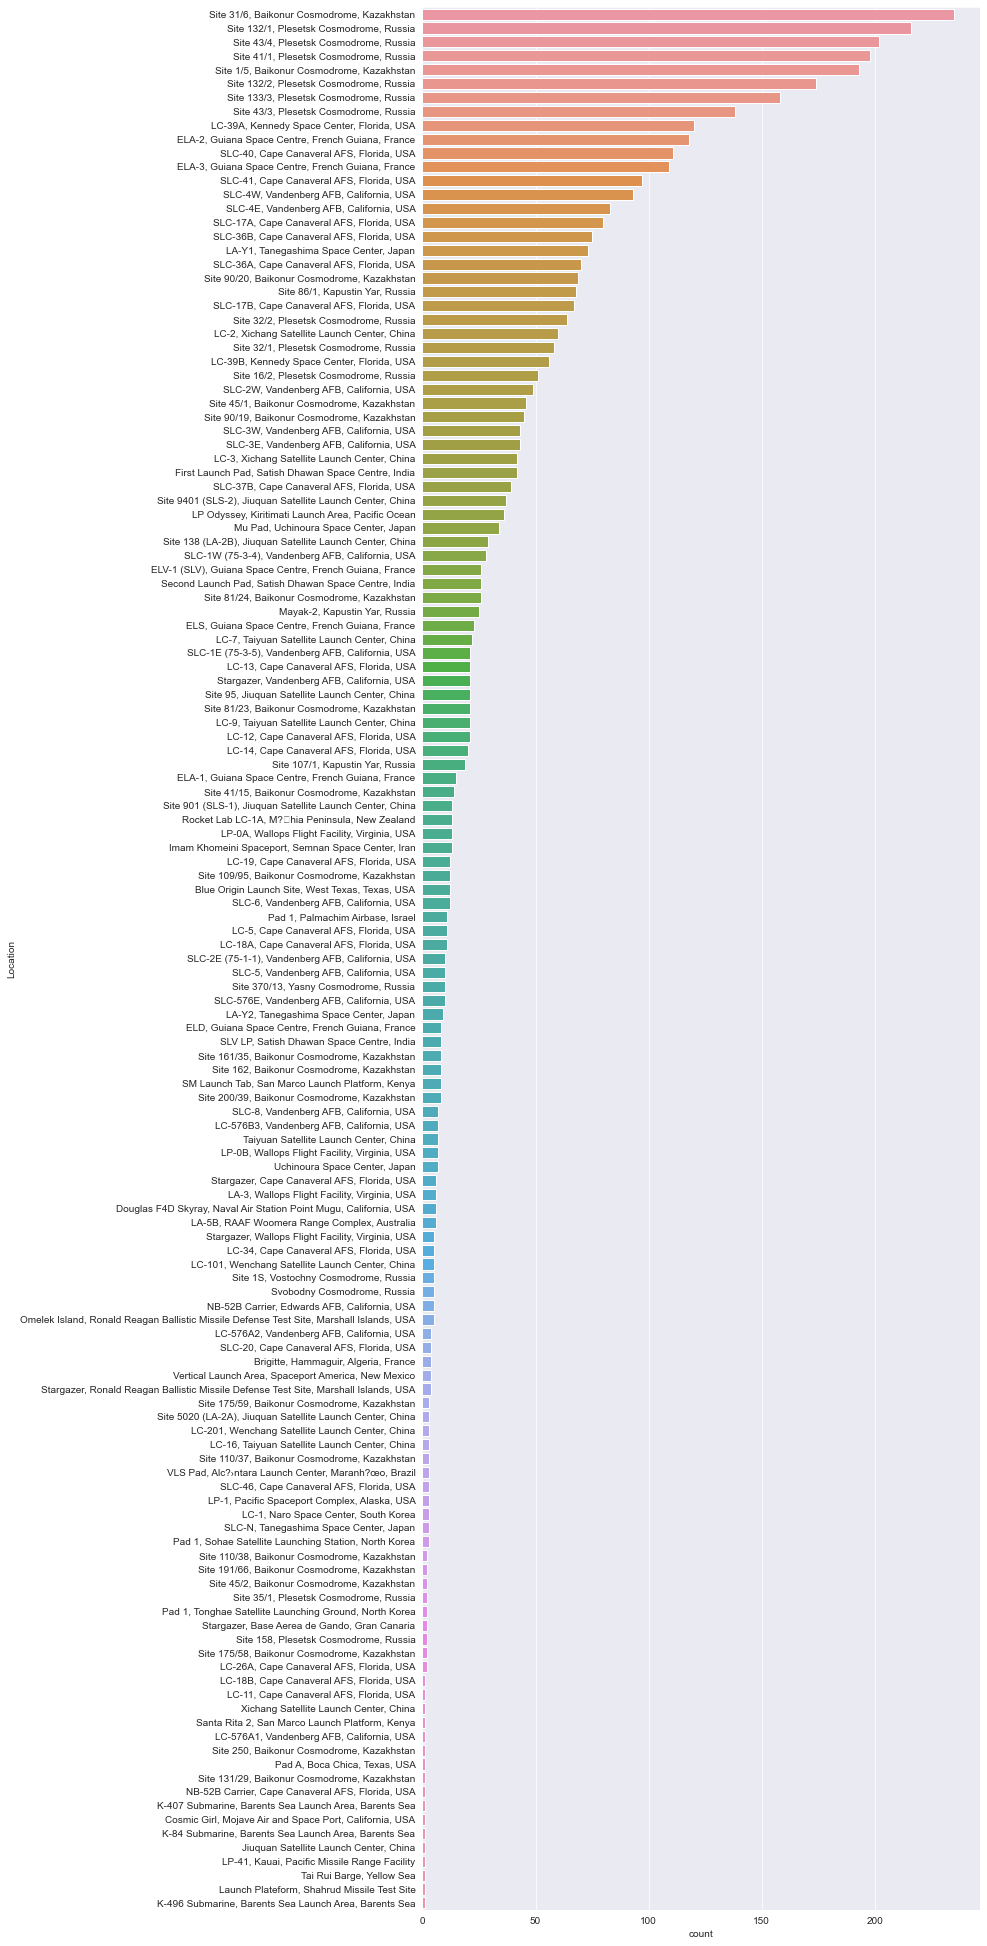

In [76]:
plt.figure(figsize=(10,35))
sns.countplot(y="Location", data=df, order= df["Location"].value_counts().index)

Let's check how many rockets are used today

Text(0.5, 1, 'Ratio: 0.22')

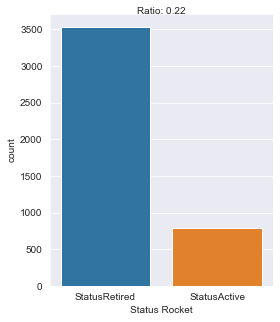

In [94]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x="Status Rocket", data=df, order= df["Status Rocket"].value_counts().index)
order = df["Status Rocket"].value_counts().index
ratio = df["Status Rocket"].value_counts()[order[1]] / df["Status Rocket"].value_counts()[order[0]] 
ax.text(0.5, 1, f"Ratio: {ratio:.2f}", transform=ax.transAxes, ha="center")


Now, let's analyse the mission status

[Text(0, 0, '3879'), Text(0, 0, '339'), Text(0, 0, '102'), Text(0, 0, '4')]

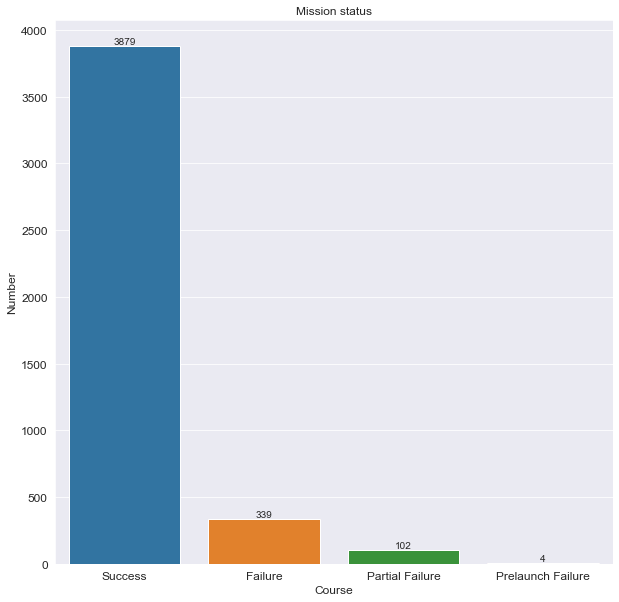

In [107]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Status Mission", data=df,order=df["Status Mission"].value_counts().index)
ax.set_title("Mission status")
ax.set_ylabel("Number", fontsize=12)
ax.set_xlabel("Course", fontsize=12)
ax.tick_params(labelsize=12)
ax.bar_label(ax.containers[0])

As we see in the graph significant portion of missions were successful. The ratio is 1 failure to 8.79 successes, including partial failures. When excluded we got 1 to 11.44.

The number per year

Text(0.5, 0, 'Year')

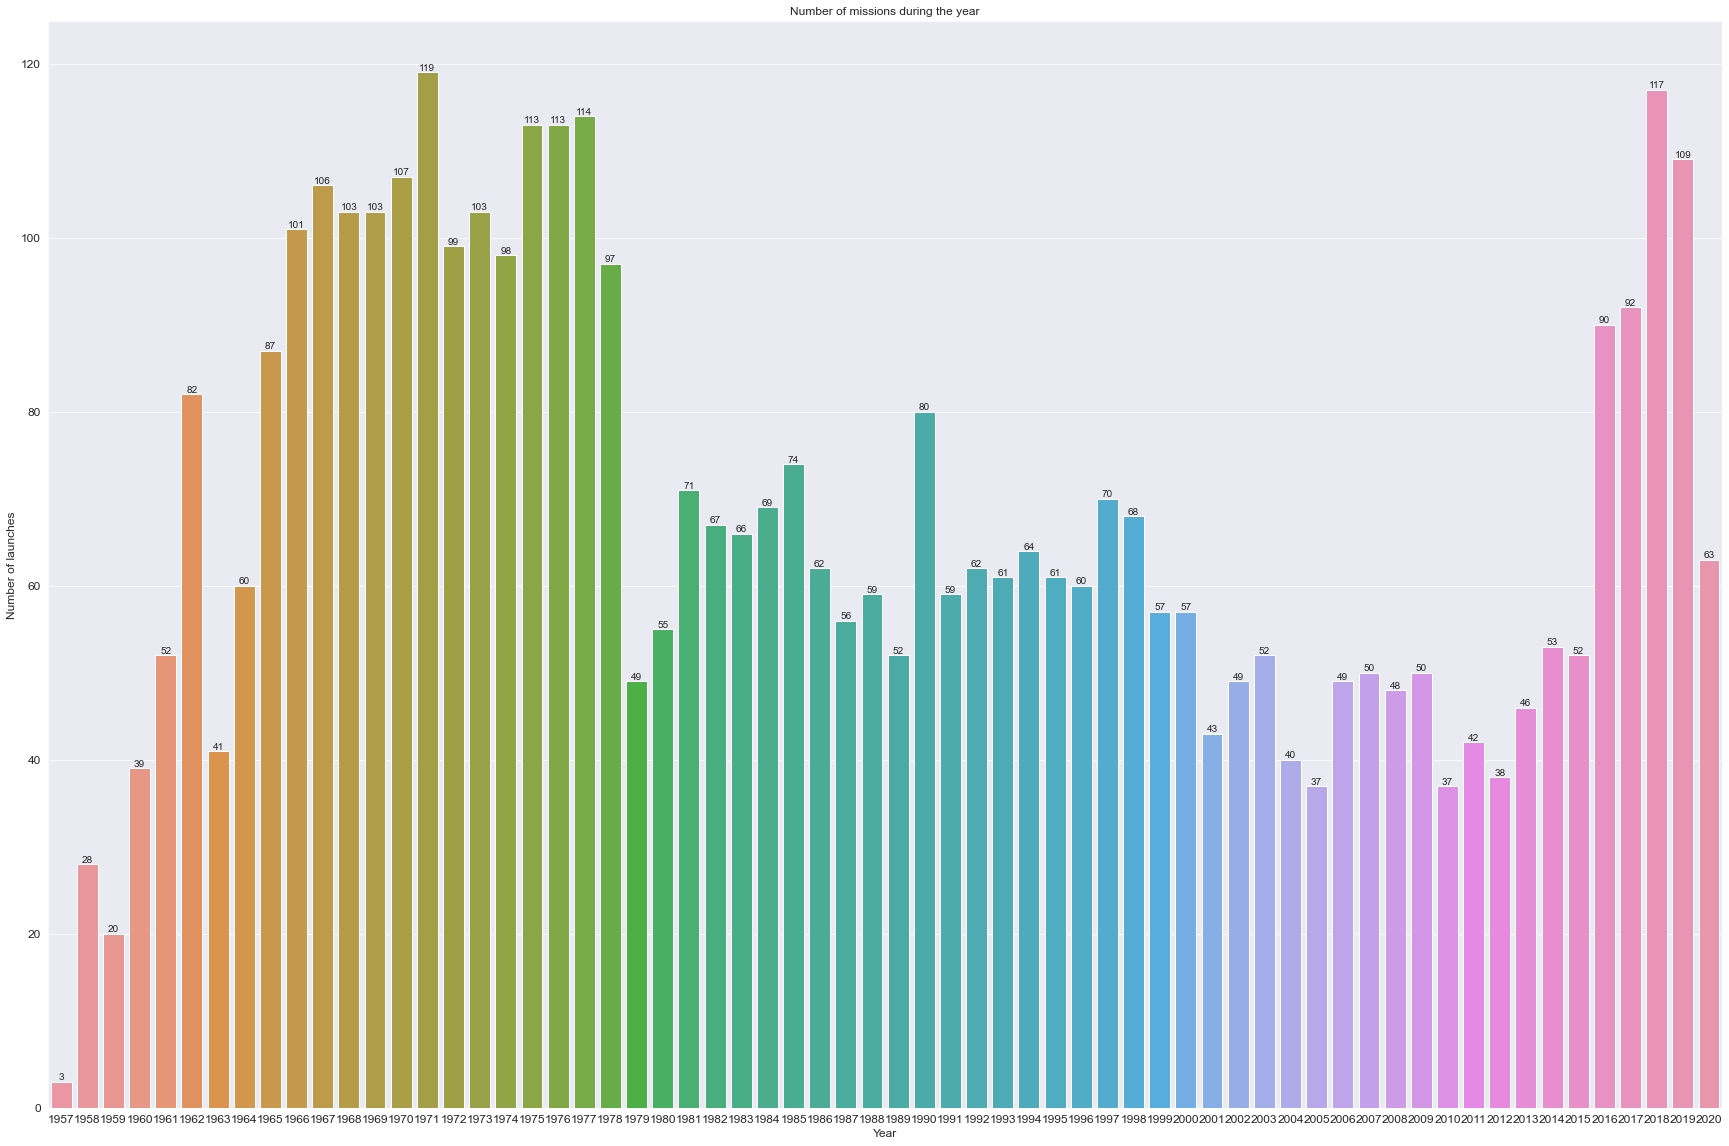

In [124]:
plt.figure(figsize=(30,20))
ax = sns.countplot(x=df["Year"])
ax.set_title("Number of missions during the year")
ax.tick_params(labelsize=12)
ax.bar_label(ax.containers[0])
ax.set_ylabel("Number of launches", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

We can see clearly, that previously during cold war we had this boom of cosmic missions. Later on, humanity stopped such aggresive approach. 
Only after almost 40 (1978-2016) the number of flights emerges to vast amounts. This is related to SpaceX as private company comming in into this market. Which was seen as "natural monopoly". 

The World map 

In [129]:
df["Country"].replace('Korea, Democratic People Republic of', "KOR",inplace=True) #<--- fixing error related to Koread

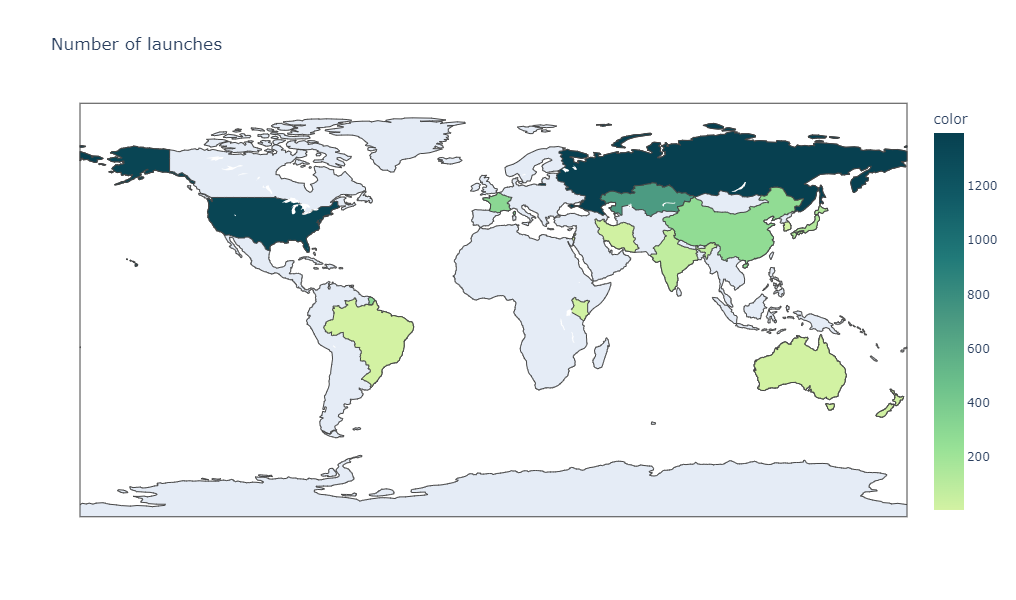

In [151]:
# getting the country codes from iso lib
def iso(country):
    return countries.get(country).alpha3 #<--- get three letter country code
df["ISO"] = df.Country.apply(lambda country: iso(country))

iso = df.ISO.value_counts()
pe.choropleth(df, locations=iso.index,color=iso.values,hover_name=iso.index, title="Number of launches", color_continuous_scale="emrld", height=600)

Sun burst chart
It will show the dominance of each countries company and mission status

C:\Users\jarek\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jarek\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jarek\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



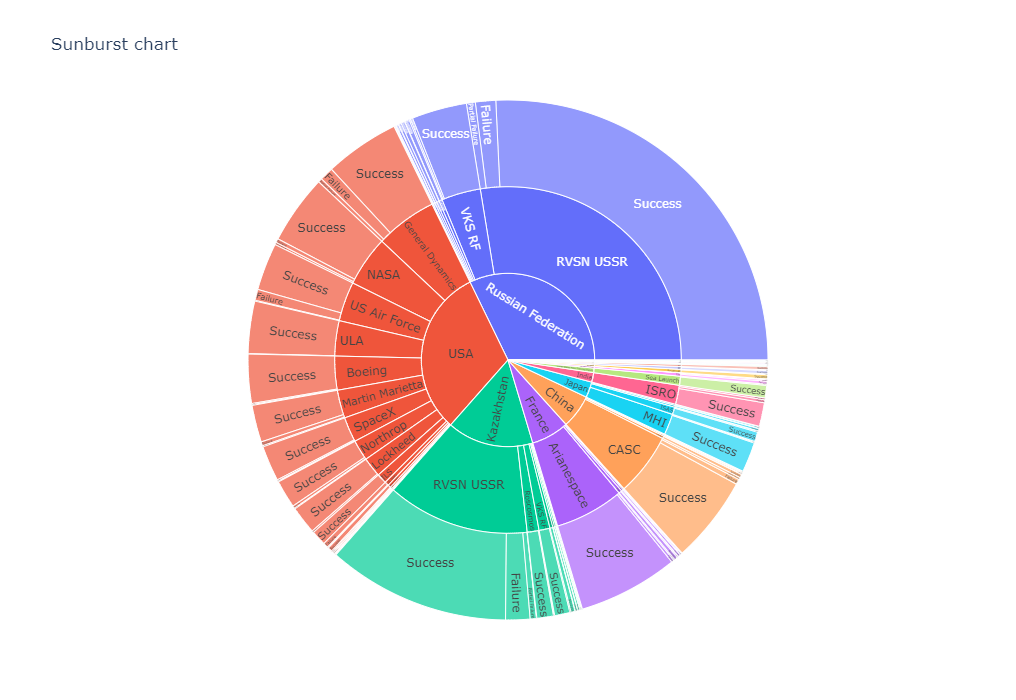

In [167]:
fig = pe.sunburst(df, path=["Country","Company Name","Status Mission"], values="Year",  title="Sunburst chart", height=700)
fig.show()

In [169]:
df_imp = df[  (df["Country"] == "USA") | (df["Country"] == "China") | (df["Country"] == "Russian Federation") ]
